### 8.6 
模拟 $n=48$，$\phi_1=1.5$，$\phi_2=-0.75$ 的 AR(2) 模型。

In [23]:
# 设置随机种子以确保结果可重复
set.seed(10086)

# (a) 模拟 AR(2) 模型并拟合
n <- 48
phi1 <- 1.5
phi2 <- -0.75

# 生成 AR(2) 模型的数据
ar2_data <- arima.sim(n = n, 
                      model = list(order = c(2, 0, 0), 
                      ar = c(phi1, phi2)))

#### (a) 
拟合正确识别的 AR(2) 模型，观察残差的时间序列图，该图支持 AR(2) 的识别吗？  

$\text{Solution.}$

In [24]:
# 拟合 AR(2) 模型
ar2_model <- arima(ar2_data, 
                   order = c(2, 0, 0), 
                   include.mean = TRUE)
residuals <- residuals(ar2_model) 

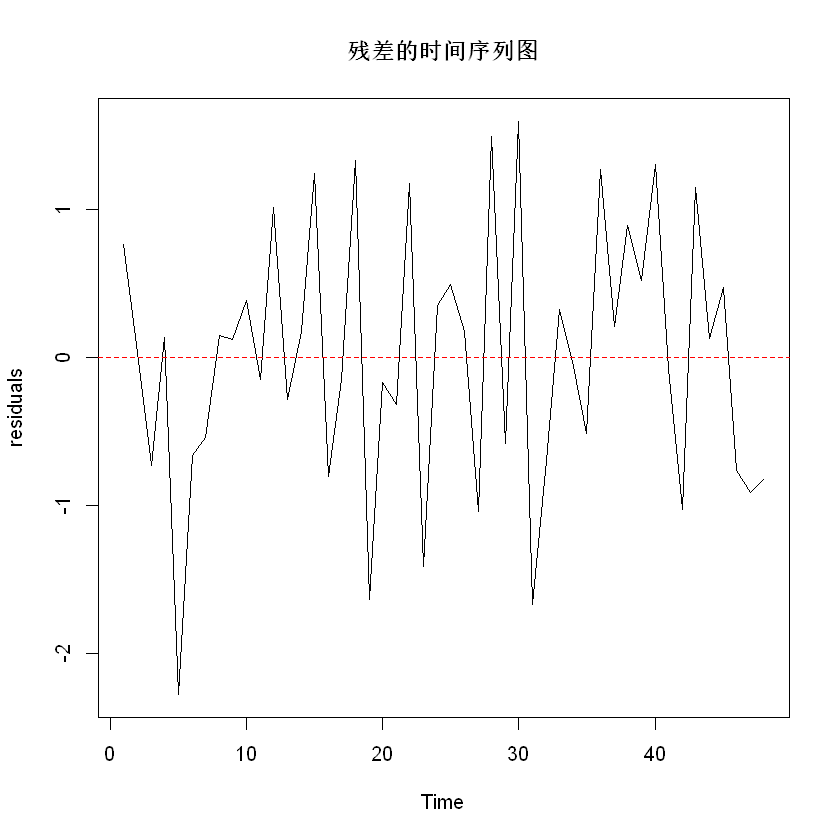

In [25]:
# 绘制残差的时间序列图
plot(residuals, type = "l", main = "残差的时间序列图")
abline(h = 0, col = "red", lty = 2)


看不出明显的趋势或周期，这较为支持AR(2)的识别。

#### (b) 
展示标准残差的正态分位数-分位数图，该图支持 AR(2) 的识别吗？  

$\text{Solution.}$

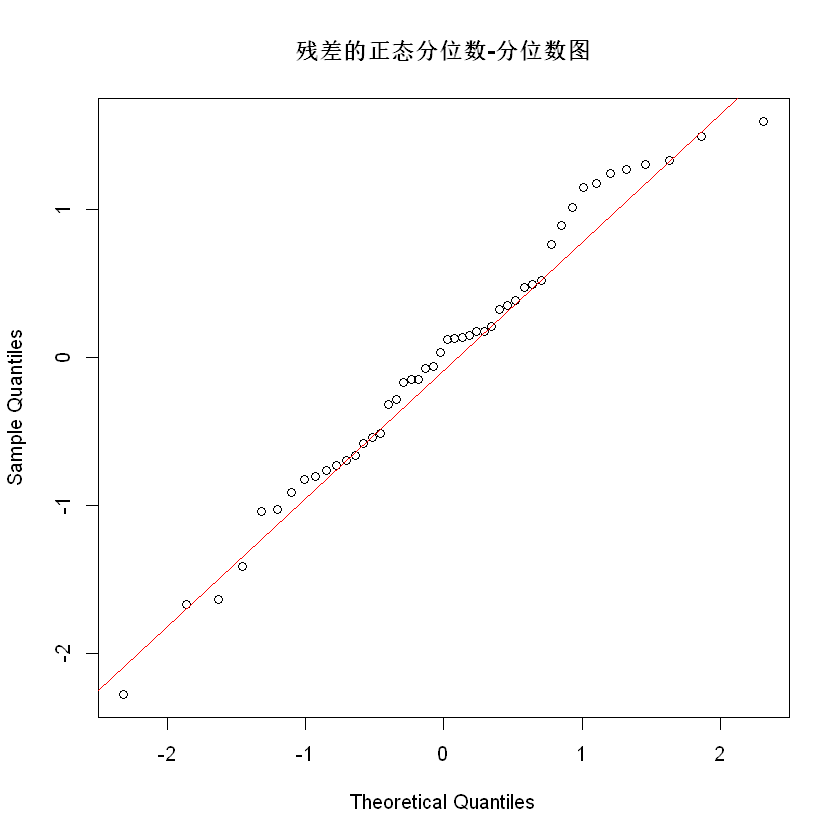

In [26]:
qqnorm(residuals, main = "残差的正态分位数-分位数图")
qqline(residuals, col = "red")

可以看出，大部分的残差点都支持正态分布的假设。但存在为数不少的异常点，明显偏离正态分布分位数直线。  

总的来讲，还是较为支持AR(2)的识别。

#### (c) 
展示残差的样本 ACF，该图支持 AR(2) 的识别吗？  

$\text{Solution.}$

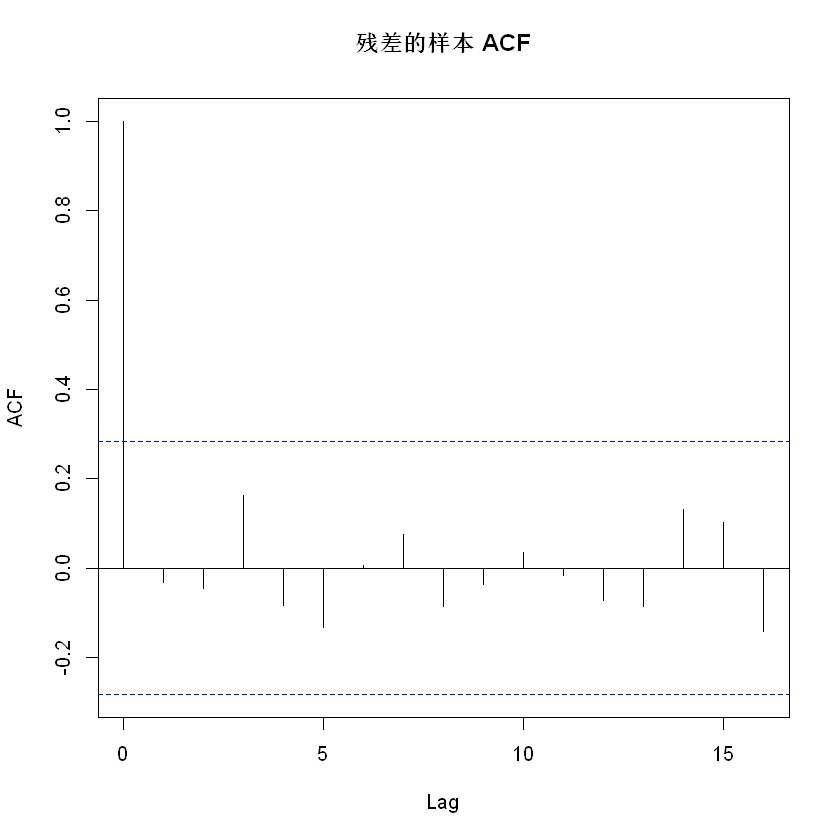

In [19]:
acf(residuals, main = "残差的样本 ACF")

残差的样本 ACF 在滞后项上都在置信区间内（蓝色阴影区域），说明残差没有显著的自相关性，很支持 AR(2) 的识别。

#### (d) 
计算 Ljung-Box 统计量，求和至 $K=12$，该统计量支持 AR(2) 的识别吗？   

$\text{Solution.}$

In [27]:
library(tseries)
K = 12
ljung_box_test = Box.test(residuals, 
                           lag = K, 
                           type = "Ljung-Box", 
                           fitdf = 2)
ljung_box_test


	Box-Ljung test

data:  residuals
X-squared = 16.608, df = 10, p-value = 0.08351


Ljung-Box 统计量的值为 $\boxed{16.608}$ 。

观察到，$p$值为0.08351，大于0.05，无法拒绝原假设，说明残差序列可以被认为是白噪声序列，支持AR(2)的识别。

### 8.11  

图表 6-31 建议对石油价格的对数差分序列识别 AR(1) 模型或者 AR(4) 模型（文件名为 oil.price）。

In [3]:
library(TSA)
data("oil.price")

Warning message:
"package 'TSA' was built under R version 4.3.3"

Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




In [4]:
summary(oil.price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.35   18.01   20.25   24.09   27.31   65.59 

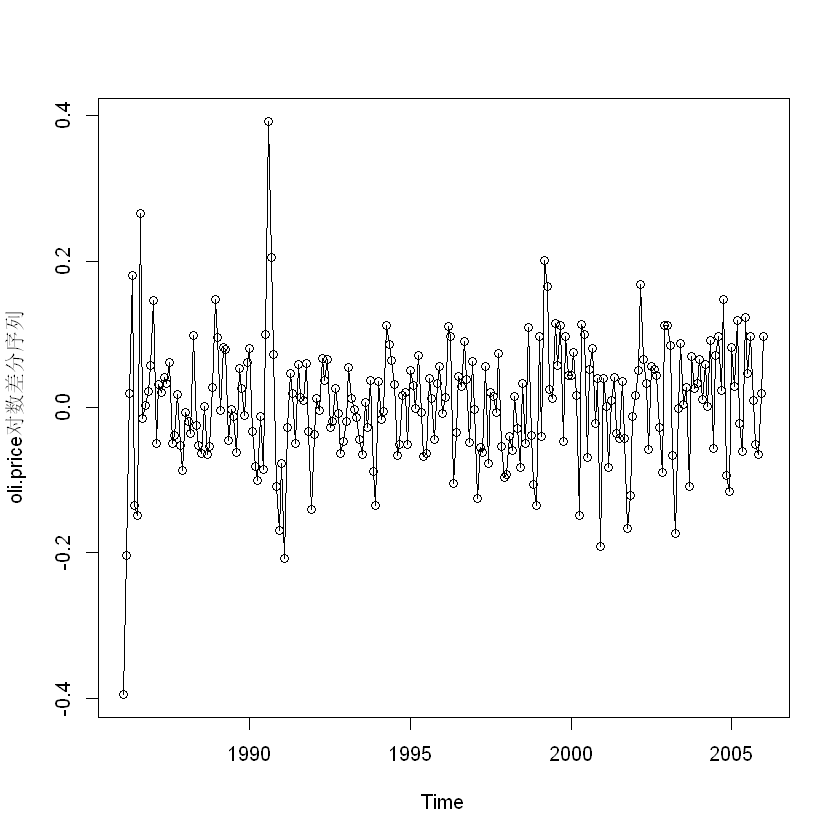

In [5]:
plot(diff(log(oil.price)), 
     type='o', 
     ylab='oli.price对数差分序列')

##### 图表 6-32

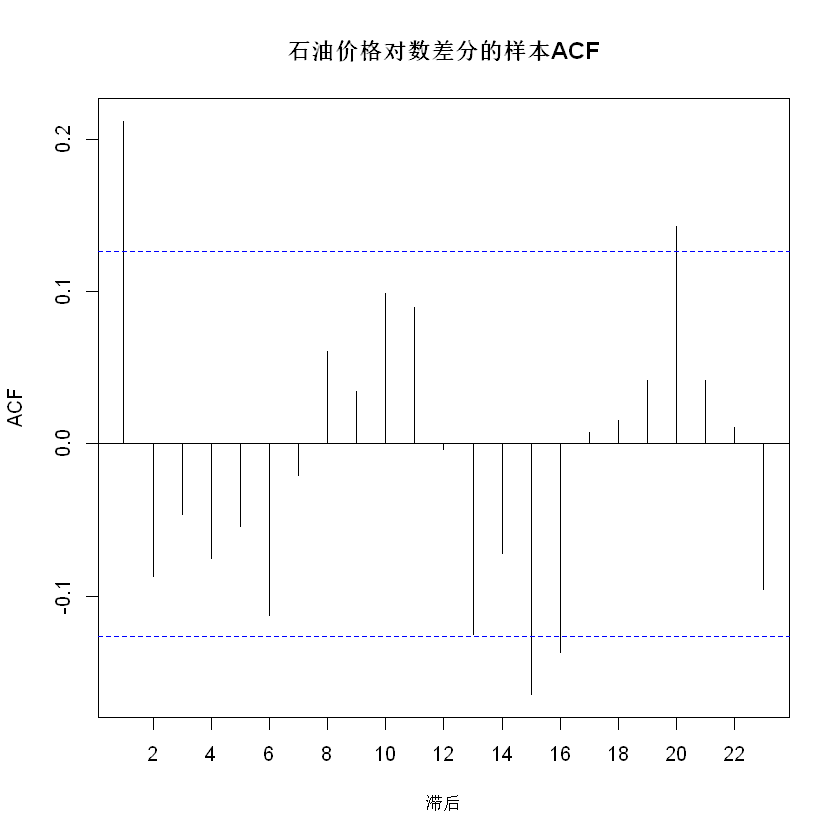

In [6]:
acf(as.vector(diff(log(oil.price))), 
    xaxp=c(0,22,11), 
    xlab='滞后', 
    main = "石油价格对数差分的样本ACF")

#### (a)
用极大似然估计法估计两个模型，用本章讨论的诊断检验对结果进行比较。  

$\text{Solution.}$

In [7]:
# 拟合模型
model.1 = arima(log(oil.price), order = c(1, 1, 0), method = 'ML')
model.2 = arima(log(oil.price), order = c(4, 1, 0), method = 'ML')

In [8]:
model.1


Call:
arima(x = log(oil.price), order = c(1, 1, 0), method = "ML")

Coefficients:
         ar1
      0.2364
s.e.  0.0660

sigma^2 estimated as 0.006787:  log likelihood = 258.55,  aic = -515.11

$\nabla ^1 Y_t = 0.2364 Y_{t-1}+e_t$

In [9]:
model.2


Call:
arima(x = log(oil.price), order = c(4, 1, 0), method = "ML")

Coefficients:
         ar1      ar2     ar3      ar4
      0.2673  -0.1550  0.0238  -0.0970
s.e.  0.0669   0.0691  0.0691   0.0681

sigma^2 estimated as 0.006603:  log likelihood = 261.82,  aic = -515.64

$\nabla ^1 Y_t = 
     0.2673 Y_{t-1} - 
     0.1550 Y_{t-2} + 
     0.0238 Y_{t-3} - 
     0.0970 Y_{t-4} + 
     e_t$

可见， ARIMA(4,1,0) 拟合得到的AIC稍好些。  

另外，两个模型得到的系数估计差别并不大。在ar1这一项上差的不大。同时对于ARIMA(4,1,0)来说，ar3、ar4的系数估计都非常小。

#### (b)
图表 6-32 建议为对数差分序列设定 MA(1) 模型，用极大似然法估计该模型并用本章讨论的检验进行诊断。  

$\text{Solution.}$

In [10]:
model.3 = arima(log(oil.price), order = c(0,1,1), method = 'ML')

model.3


Call:
arima(x = log(oil.price), order = c(0, 1, 1), method = "ML")

Coefficients:
         ma1
      0.2956
s.e.  0.0693

sigma^2 estimated as 0.006689:  log likelihood = 260.29,  aic = -518.58

$
\nabla ^1 Y_t = e_t - 0.2956e_{t-1}
$

值得注意的是，这个拟合结果的AIC值比前面的都要出色。 

#### (c)
基于（a）、（b）部分给出的结果，你更偏好 AR(1)、AR(4) 和 MA(1) 三个模型中的哪一个？  

$\text{Solution.}$

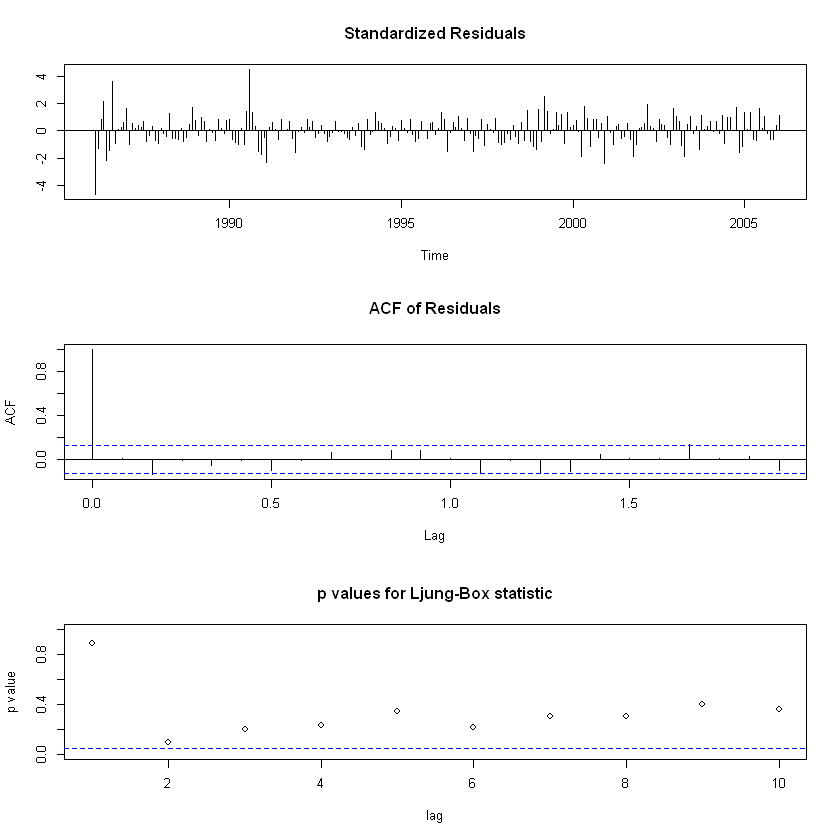

In [13]:
tsdiag(model.1)

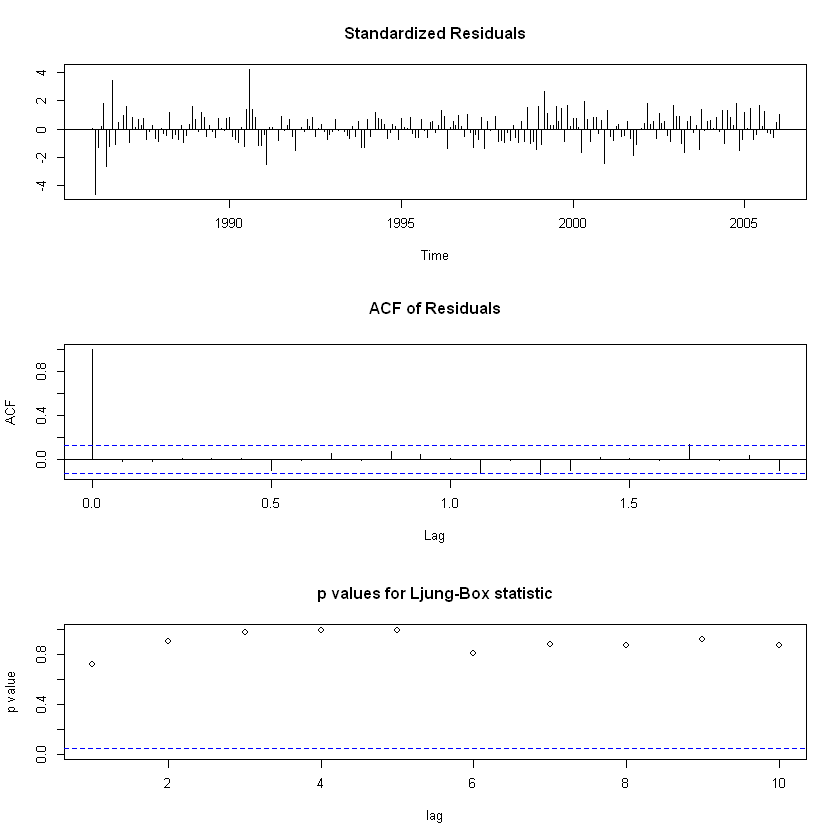

In [14]:
tsdiag(model.2,main='Model 3')

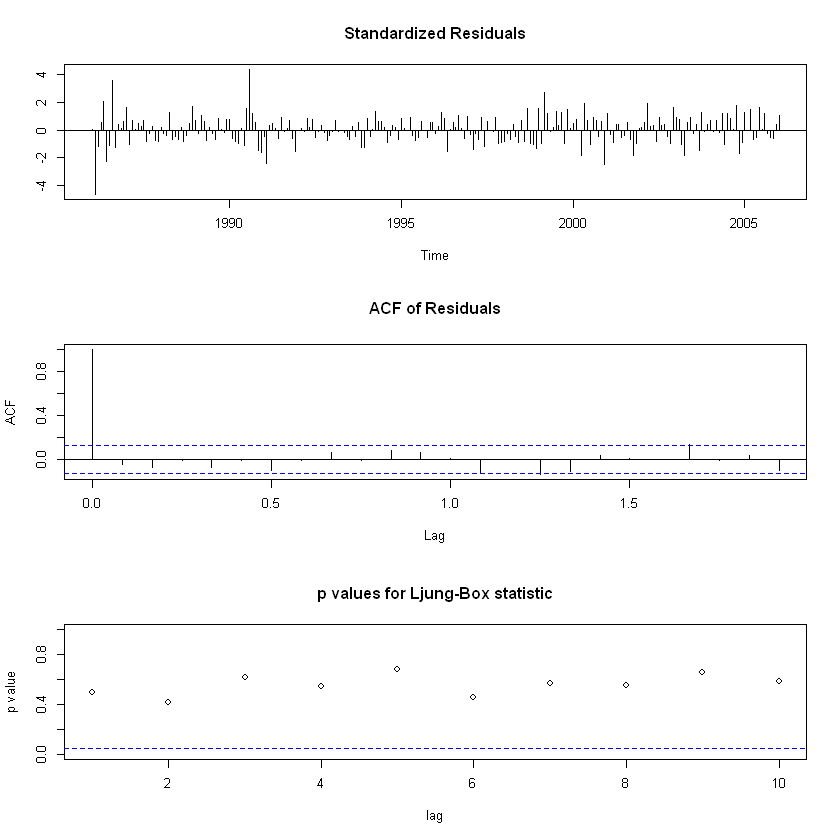

In [15]:
tsdiag(model.3,main='Model 3')

通过诊断可以发现，AR(4)和MA(1)的结果都没有较大的问题。但AR(1)在Ljung-Box检验中表现得比较差。

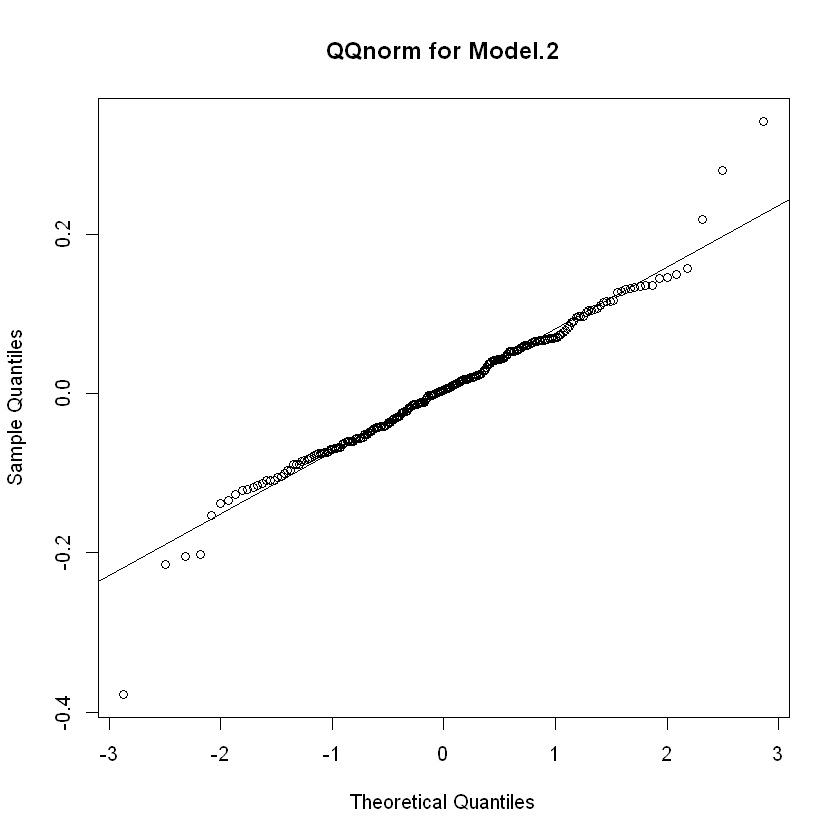

In [22]:
qqnorm(residuals(model.2), main='QQnorm for Model.2')
qqline(residuals(model.2))

In [23]:
shapiro.test(residuals(model.2))


	Shapiro-Wilk normality test

data:  residuals(model.2)
W = 0.96957, p-value = 4.959e-05


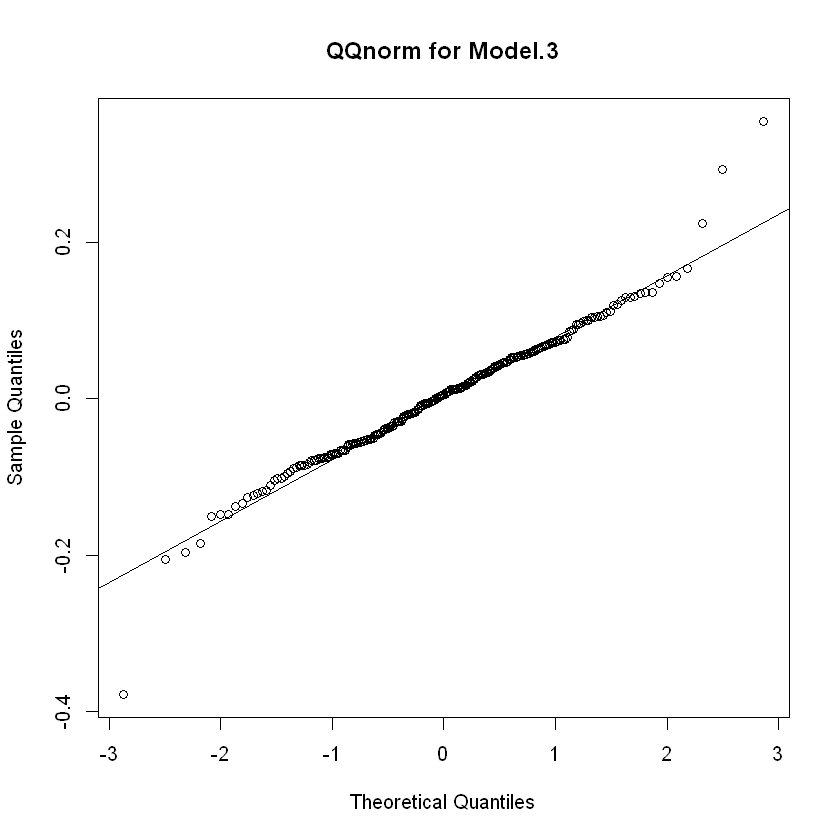

In [ ]:
qqnorm(residuals(model.3), main='QQnorm for Model.3')
qqline(residuals(model.3))

In [21]:
shapiro.test(residuals(model.3))


	Shapiro-Wilk normality test

data:  residuals(model.3)
W = 0.96883, p-value = 3.937e-05


进一步确认，AR(4)和MA(1)的残差分布都较为接近正态分布。  

在这样的条件下，根据AIC值，我更倾向于用IMA(1,1)去拟合模型。